# 1. Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import features
from regressions import LinearRegression, RidgeRegression, BayesianLinearRegression

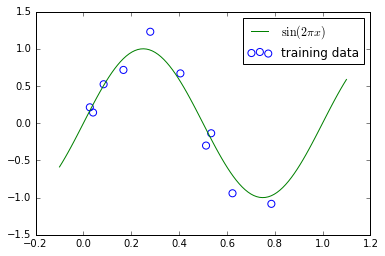

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.random.uniform(size=sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(-0.1, 1.1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()

## 1.1. Example: Polynomial Curve Fitting 

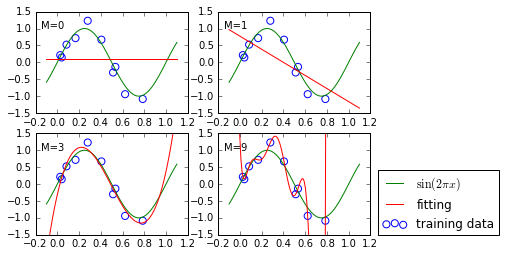

In [3]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = features.Polynomial(degree)
    X_train = feature.transform(x_train[:, None])
    X_test = feature.transform(x_test[:, None])

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    y = model.predict(X_test)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)

## Regularization

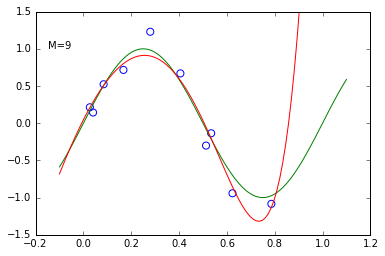

In [4]:
feature = features.Polynomial(9)
X_train = feature.transform(x_train[:, None])
X_test = feature.transform(x_test[:, None])

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(-0.15, 1))

## 1.2.6 Bayesian curve fitting

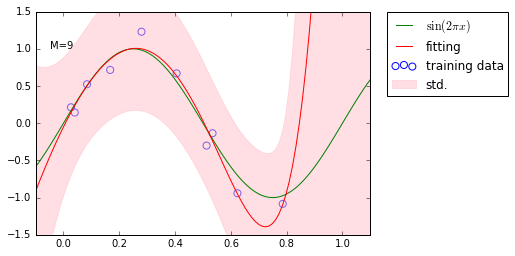

In [5]:
bayes_model = BayesianLinearRegression(alpha=5e-4, beta=2)
bayes_model.fit(X_train, y_train)

y, y_err = bayes_model.predict_dist(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(x_test.min(), x_test.max())
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(-0.05, 1))
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)